In [106]:
import numpy as np
import matplotlib.pyplot as plt
from img_process import mirror_padding

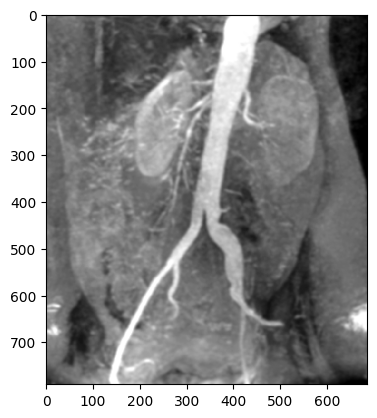

In [107]:
a = plt.imread("images/Fig0235(c)(kidney_original).tif")

plt.imshow(a, cmap='gray')

In [108]:
def Sobal_Filter(img, return_abs=False):
    # Get Constant metrices
    wx = np.array([[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]])
    wy = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
    # Get Constant metrices
    img = mirror_padding(img, 3, 3)
    m, n = img.shape
    output = np.zeros([m, n])
    for x in range(3, m - 3):
        for y in range(3, n - 3):
            elements = img[x - 3 // 2 : x + 3 // 2 + 1, y - 3 // 2 : y + 3 // 2 + 1]
            gx = np.sum(np.multiply(wx, elements))
            gy = np.sum(np.multiply(wy, elements))
            if return_abs == True:
                output[x, y] = np.abs(gx) + np.abs(gy)
            else:
                output[x, y] = np.sqrt(gx**2 + gy**2)
    return output[3 : m - 3, 3 : n - 3]

In [109]:
a_sobel = Sobal_Filter(a)

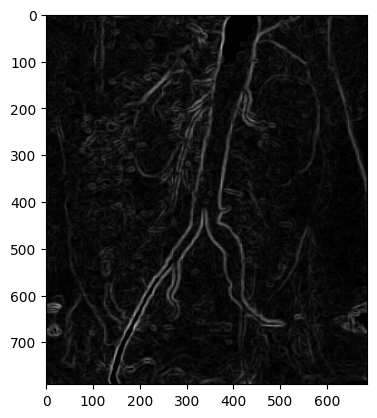

In [110]:
plt.imshow(a_sobel, cmap="gray")

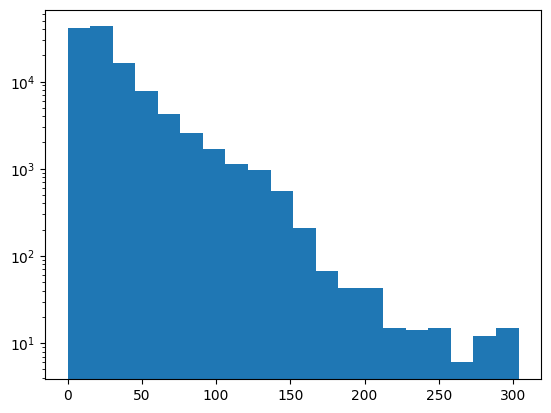

In [111]:
plt.hist(a_sobel[200:500, 0:400].ravel(), bins=20)
plt.yscale("log")
plt.show()

In [112]:
index = np.where((a_sobel > 100) & (a_sobel < 200))[0]
index

array([  0,   0,   0, ..., 789, 789, 789])

In [113]:
a_sobel[index] = 400

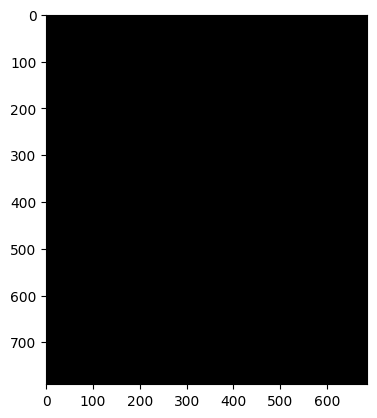

In [114]:
plt.imshow(a_sobel, cmap="gray")